# **Final Project 2 - Logistic Regression & SVM**

**Kelompok 4 - PYTN-KS-014**

1. Hafidah Dwi cahyani (PYTN-KS14-003)
2. Putri Dresty Faristuta (PYTN-KS14-022)
3. Aulia Putri Hidayat (PYTN-KS14-023)


### A.1 Introduction

#### A.1.1. Latar Belakang 


Cuaca merupakan keadaan atmosfer di suatu wilayah pada suatu waktu tertentu yang mencakup suhu udara, kelembaban, tekanan udara, dan kondisi cuaca seperti hujan, salju, atau berawan. Pengetahuan tentang cuaca sangat penting dalam kehidupan sehari-hari, termasuk untuk perencanaan aktivitas luar ruangan, navigasi, pertanian, transportasi, dan manajemen sumber daya alam. Pemahaman tentang faktor-faktor yang mempengaruhi cuaca membantu kita dalam mengambil keputusan yang tepat, menjaga keselamatan, dan mengoptimalkan aktivitas kita sesuai dengan kondisi cuaca yang ada.

Prediksi atau perkiraan cuaca di hari esok menjadi sangat penting, karena dapat mempengaruhi aktivitas yang akan dilakukan oleh manusia. Bagaimanakah cuacar besok? Apakah hujan atau tidak dapat dinilai dari beberapa faktor klasifikasinya. Metode pendekatan model statistik dan machine learning untuk melakukan prediksi hujan akan dilakukan pada project ini. Metode yang digunakan untuk memprekdiksi keadaan hujan dengan menggunakan data yang diambil di Australia adalah Logistic Regression dan SVM.


#### A.1.2 Dataset

Dataset yang digunakan untuk pemodelan ini diperoleh open source yang didapatkan dari kaggle. Dataset ini bernama __Rain in Australia__. Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. RainTomorrow adalah variabel target untuk diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:

- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.
- RainTomorrow

#### A.1.3 Objektif

Objektif yang ingin dicapai dari pemodelan ini adalah: 
- Mengetahui faktor-faktor yang dapat mempengaruhi predikssi Hujan di Wilayah Australia
- Membuat pemodelan machine learning untuk memprediksi hujan di wilayah Australia berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode Logistic Regression dan SVM.

### B.2 Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# data visualization
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
# statistical data visualization
import seaborn as sns 
import plotly.express as px
import missingno as msno

from sklearn import preprocessing # import LabelEncoder
from sklearn.linear_model import LogisticRegression # import library logistic regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # splitting data
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # import library support vector machine (SVM)
# Untuk library confussion matrix
from sklearn.metrics import confusion_matrix
# Untuk library mendapatkan accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score
# Untuk paramater yang terbaik
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score # import library mendapatkan accuracy score
from sklearn.metrics import confusion_matrix # import library confussion matrix
from sklearn.metrics import classification_report # import library classification report
import pickle # import library pickle
import warnings # ignore the warning
warnings.filterwarnings('ignore')

import pickle

### C.3 Load Data
-----
Data Loading adalah proses untuk menyalin dan memuat kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [2]:
# memasukkan url untuk load data
url = 'https://raw.githubusercontent.com/auliaputrih/KampusMerdeka-FinalProject2/main/weatherAUS.csv'

In [3]:
# membaca data
dt_rain = pd.read_csv(url)
dt_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
# duplikasi data
data_rain = dt_rain.copy()

In [ ]:
# memeriksa dimensi data
data_rain.shape

(145460, 23)

In [ ]:
# menampilkan data teratas
data_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# menampilkan data terbawah
data_rain.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
# melihat tipe data
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# mengecek kolom kategori

categorical_kol = [col for col in data_rain.columns if data_rain[col].dtypes =='O']

print('terdapat {} kolom kategori'.format(len(categorical_kol)))
print('kolom kategori sebanyak:', categorical_kol)

terdapat 7 kolom kategori
kolom kategori sebanyak: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# mengecek kolom numerik

numerical_kol = [col for col in data_rain.columns if data_rain[col].dtypes !='O']

print('terdapat {} kolom numerik'.format(len(numerical_kol)))
print('kolom numerik sebanyak:', numerical_kol)

terdapat 16 kolom numerik
kolom numerik sebanyak: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### D.4 Data Cleaning
-----
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.

#### D.4.1 Mengecek data yang kosong, tipe data, unique data



In [ ]:
# melihat data yang kosong
data_rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# mengecek tipe data
data_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
# melihat data unik
data_rain.nunique().sort_values(ascending=False)

Date             3436
Rainfall          681
Pressure3pm       549
Pressure9am       546
MaxTemp           505
Temp3pm           502
Temp9am           441
MinTemp           389
Evaporation       358
Sunshine          145
Humidity9am       101
Humidity3pm       101
WindGustSpeed      67
Location           49
WindSpeed3pm       44
WindSpeed9am       43
WindDir3pm         16
WindDir9am         16
WindGustDir        16
Cloud9am           10
Cloud3pm           10
RainToday           2
RainTomorrow        2
dtype: int64

#### D.4.2 Mengganti tipe data pada datetime

In [ ]:
# memisahkan pada kolom Date karena terlalu banyak nilai unique
data_rain['Date'] = pd.to_datetime(data_rain['Date'])

In [ ]:
# mengonversi data tahun dari date
data_rain['Year'] = data_rain['Date'].dt.year

# mengonversi data bulan dari date
data_rain['Month'] = data_rain['Date'].dt.month

# mengonversi data hari dari date
data_rain['Day'] = data_rain['Date'].dt.day

# menghapus data
data_rain.drop('Date', axis=1, inplace = True)

data_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Karena kolom Date sudah diubah tipe datanya diperlukan untuk memisahkannya dari numerik
numerical_col = [var for var in data_rain.columns if data_rain[var].dtype!='O']
# menghapus data yang telah dipisah dari Date
numerical_col.remove('Month')
numerical_col.remove('Day')
numerical_col.remove('Year')

print('There are {} Numerical Variables\n'.format(len(numerical_col)))

print('The Numerical Variables are :', numerical_col)

print(''*5)
print('_'*110)
print(''*5)


# meanmpilkan data
data_rain[numerical_col].head()

There are 16 Numerical Variables

The Numerical Variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

______________________________________________________________________________________________________________



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


#### D.4.3 Melihat secara keseluruhan data yang kosong dan terduplikasi

In [ ]:
# melihat presentase dan jumlah dari setiap kolom yang nilainya kosong
df_type = pd.DataFrame(data_rain.dtypes, columns=['data type'])
null = pd.DataFrame(data_rain.isnull().sum(), columns=['null count'])                                                    
null_precentage = pd.DataFrame(data_rain.isnull().sum()/data_rain.shape[0]*100, columns=['percentage result'])

show_null = pd.concat([df_type, null, null_precentage], axis='columns')
show_null

,data type,null count,percentage result
Location,object,0,0.000000
MinTemp,float64,1485,1.020899
MaxTemp,float64,1261,0.866905
Rainfall,float64,3261,2.241853
Evaporation,float64,62790,43.166506
Sunshine,float64,69835,48.009762
WindGustDir,object,10326,7.098859
WindGustSpeed,float64,10263,7.055548
WindDir9am,object,10566,7.263853
WindDir3pm,object,4228,2.906641


In [ ]:
# megecek kolom yang terduplikasi
data_rain.duplicated().sum()

0

In [ ]:
# mengecek kolom yang kosong
data_rain[numerical_col].isnull().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustSpeed    True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
dtype: bool

#### D.4.4 Megecek kolom numerik berdistribusi normal atau tidak

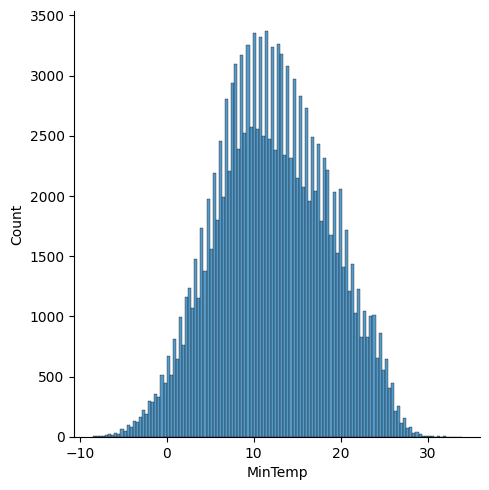

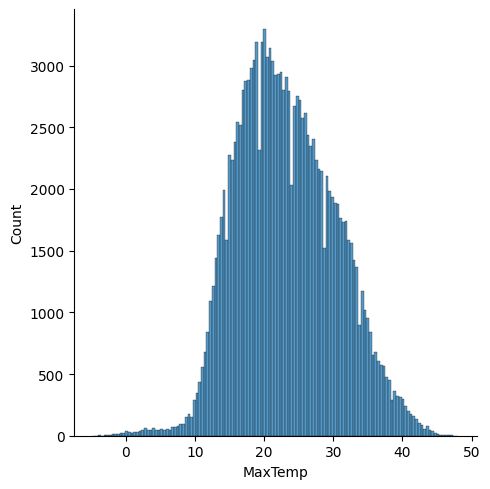

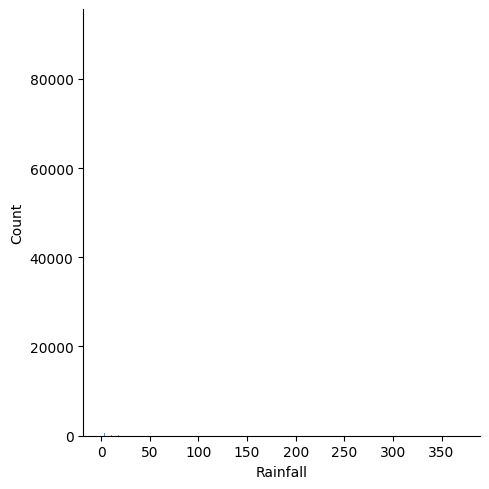

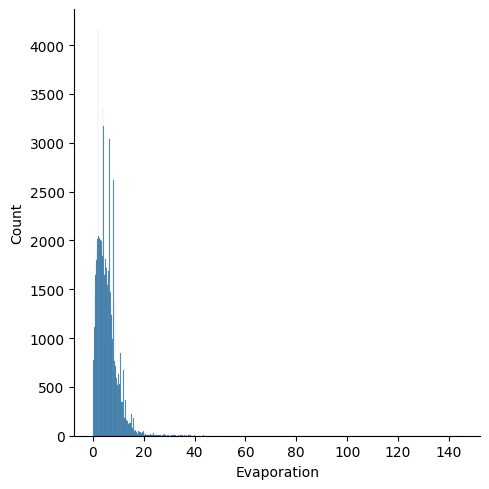

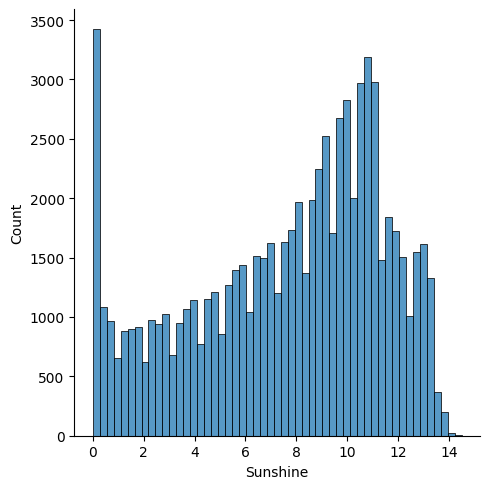

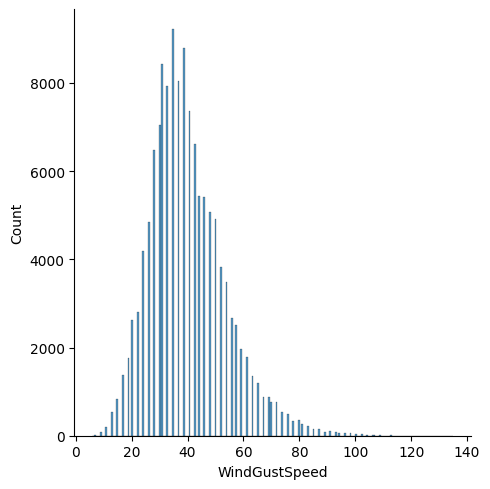

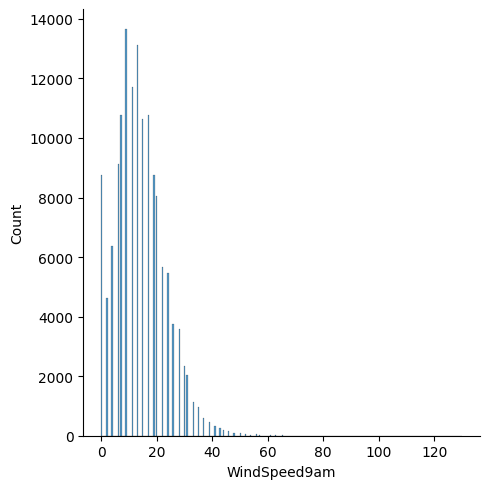

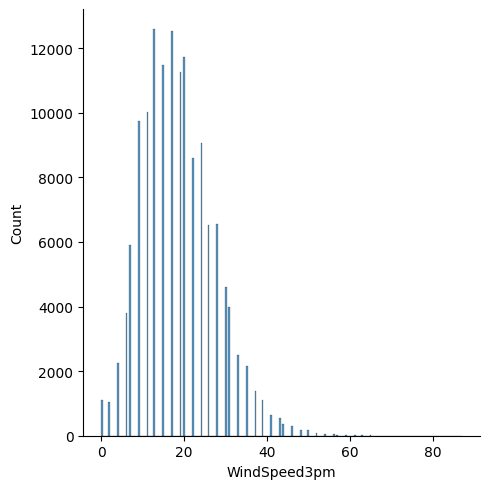

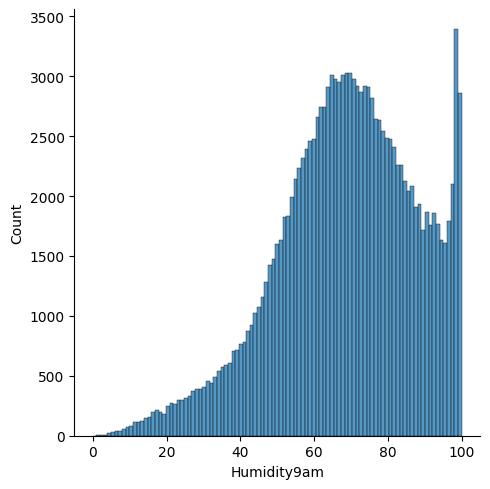

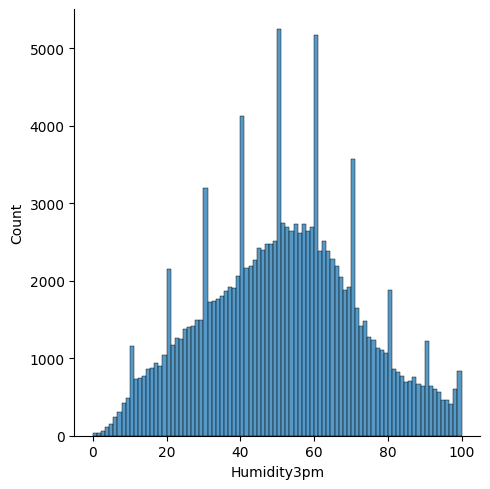

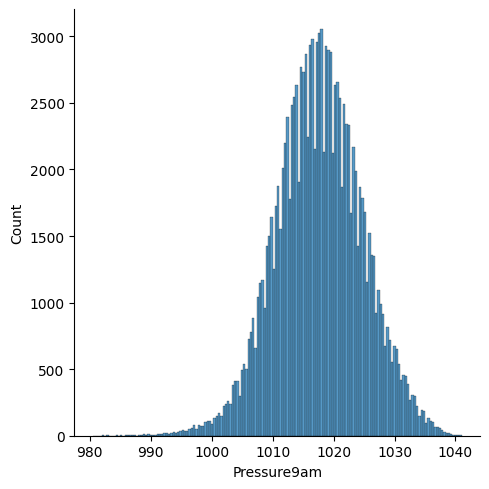

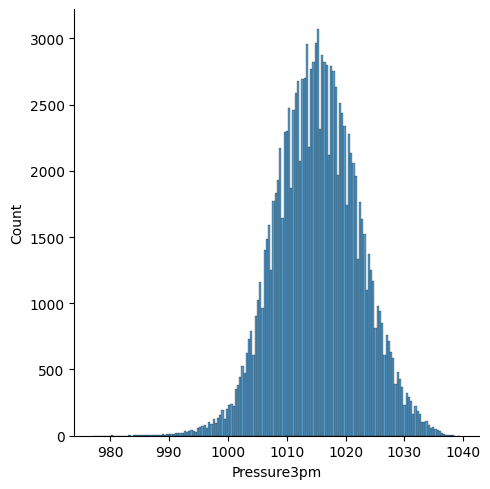

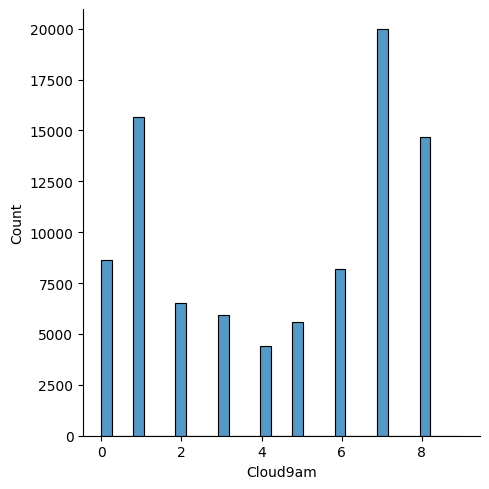

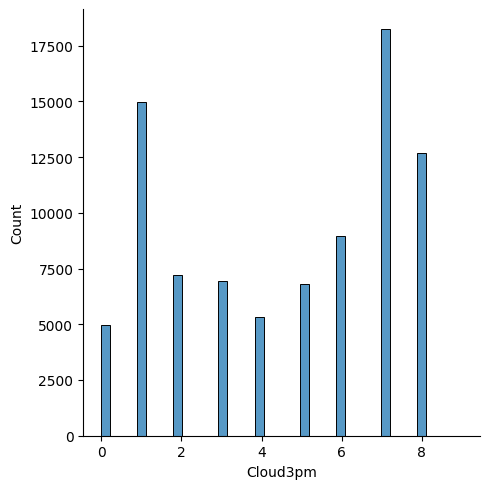

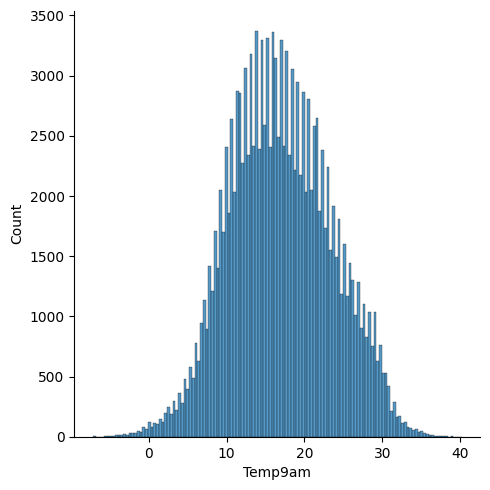

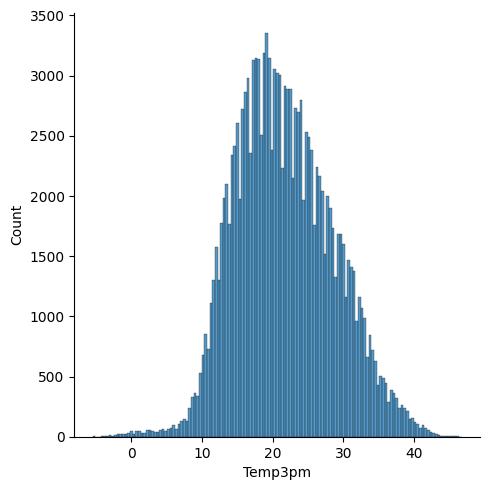

In [ ]:
# menampilkan visualisasi distribusi normal dari kolom numerik
for i in numerical_col:
    sns.displot(data_rain[i])
    plt.show()

* Hasil Sementara:

  Berdasarkan visualisasi di atas terlihat bahwa data pada tipe kategori masih belum berdistribusi normal dikarenakan masih banyak terdapat data numerik pada kolom yang null. Sehingga diperlukan untuk mengisinya dengan data mean/median dari setiap kolom yang null. Jika terdapat skewness maka diperlukan pengisian nilai yang kosong pada kolom dengan median.

In [ ]:
# mengecek nilai yang kosong pada data numerik
data_rain[numerical_kol].isnull().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustSpeed    True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
dtype: bool

In [ ]:
# mengecek nilai yang kosong pada data numerik
data_rain.isnull().any()

Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
Year             False
Month            False
Day              False
dtype: bool

In [ ]:
# melihat kolom numerik
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

#### D.4.5 Mengecek outlier kolom numerik

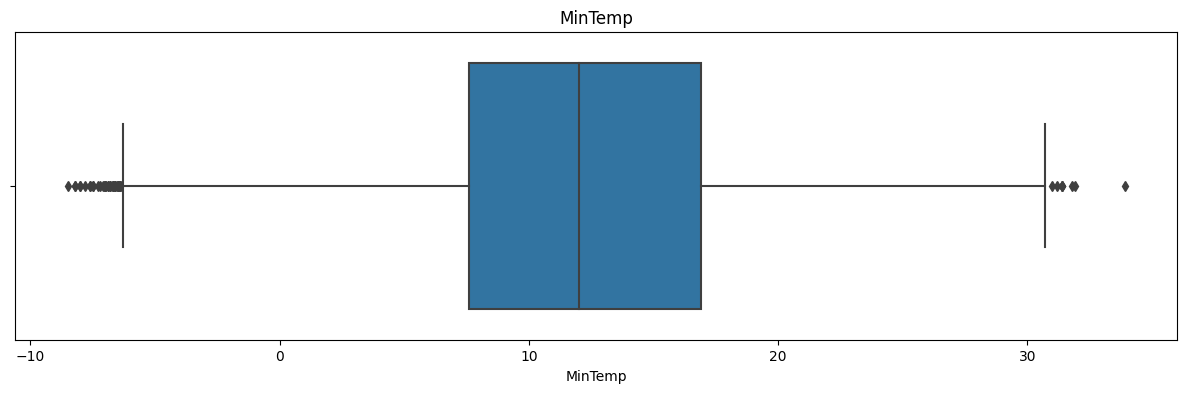

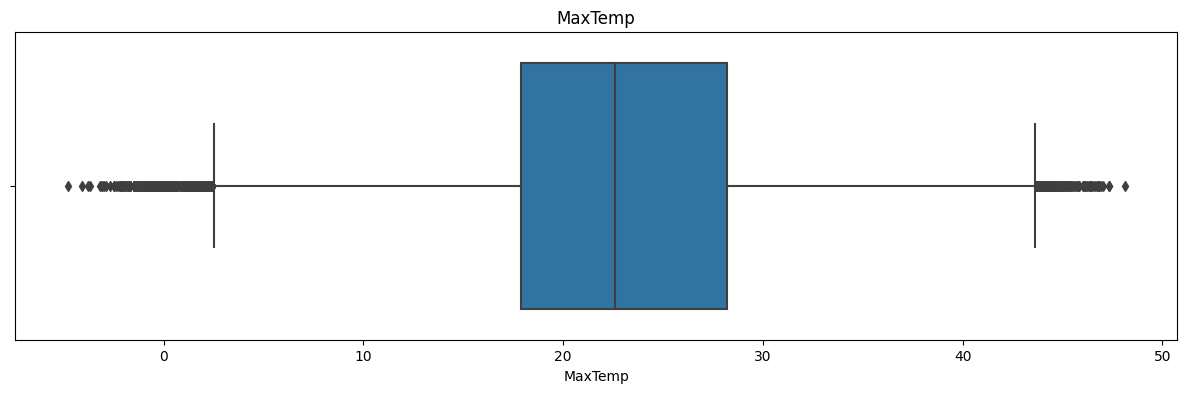

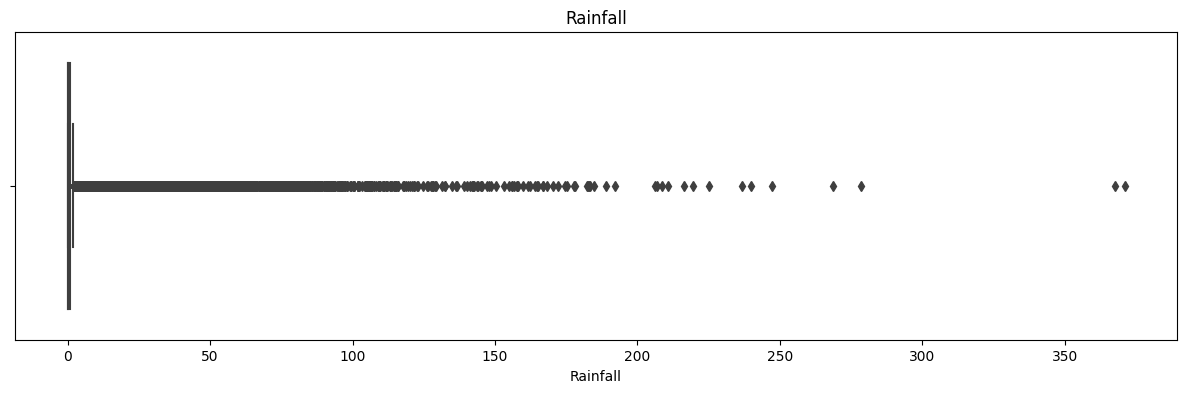

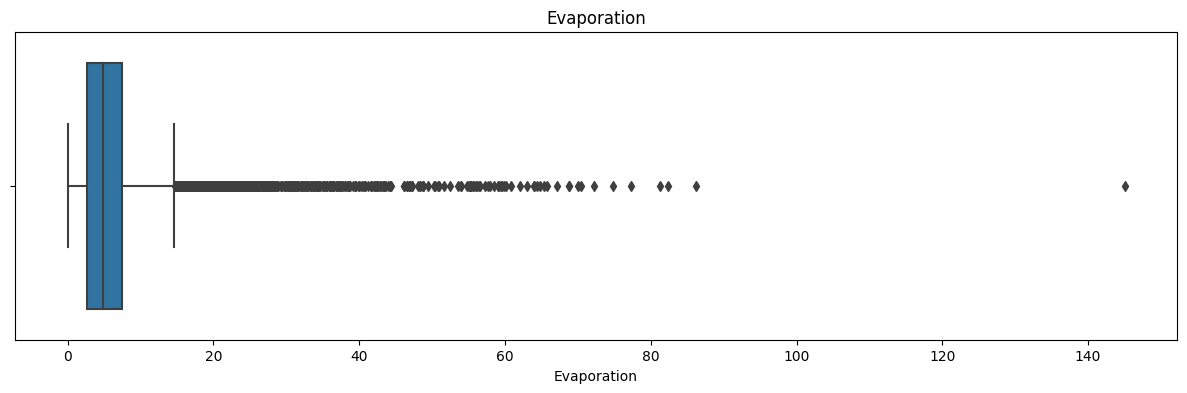

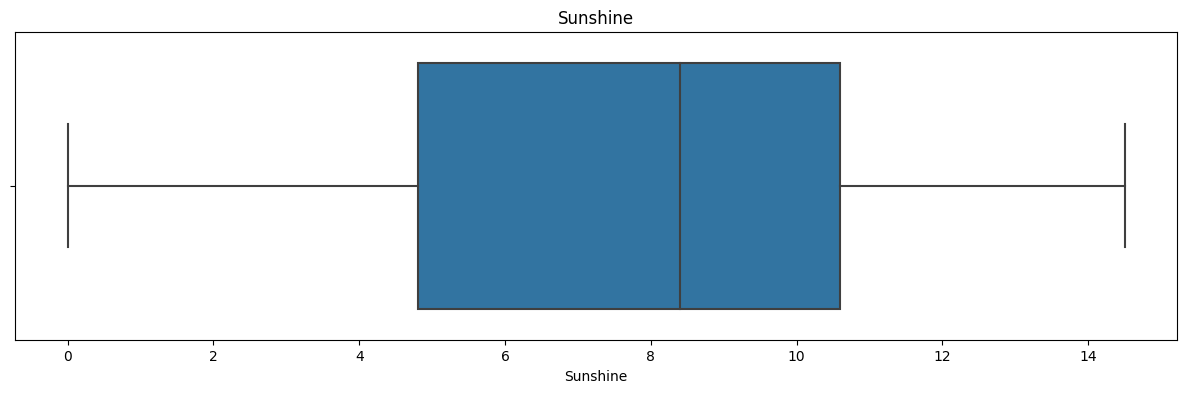

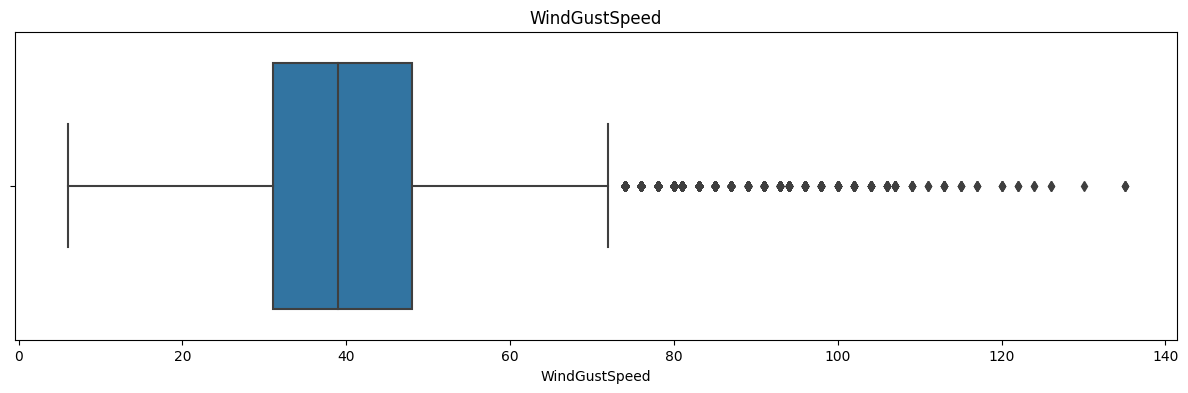

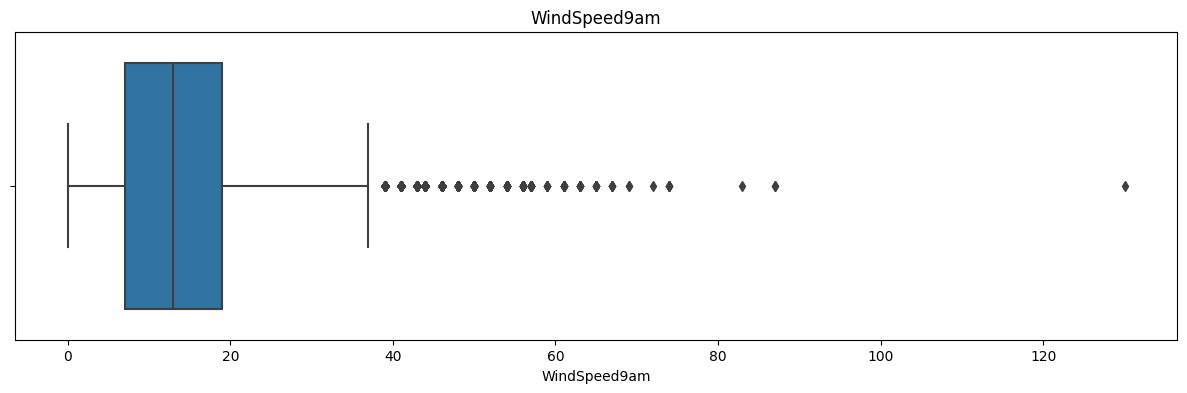

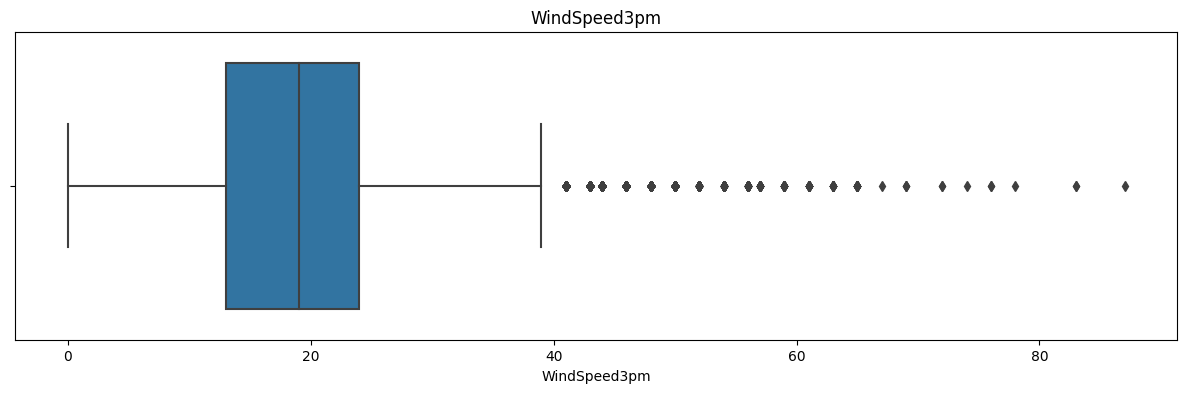

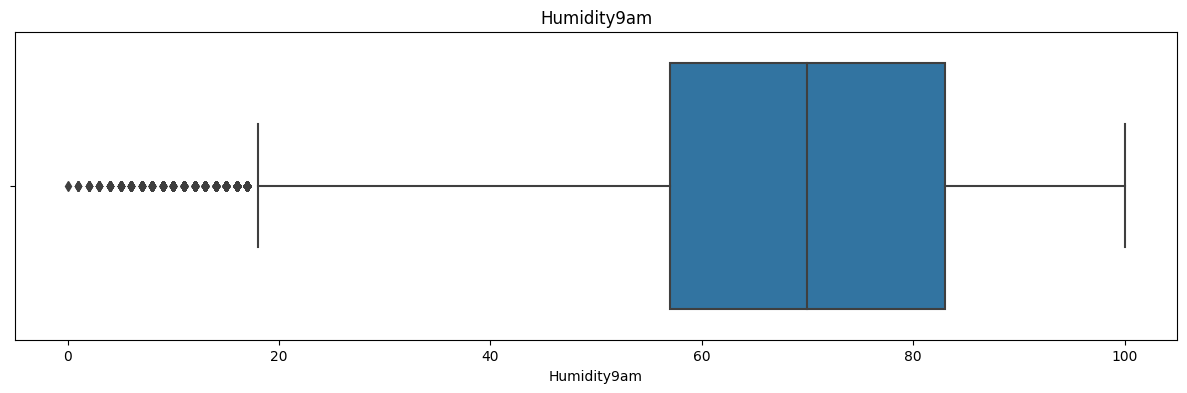

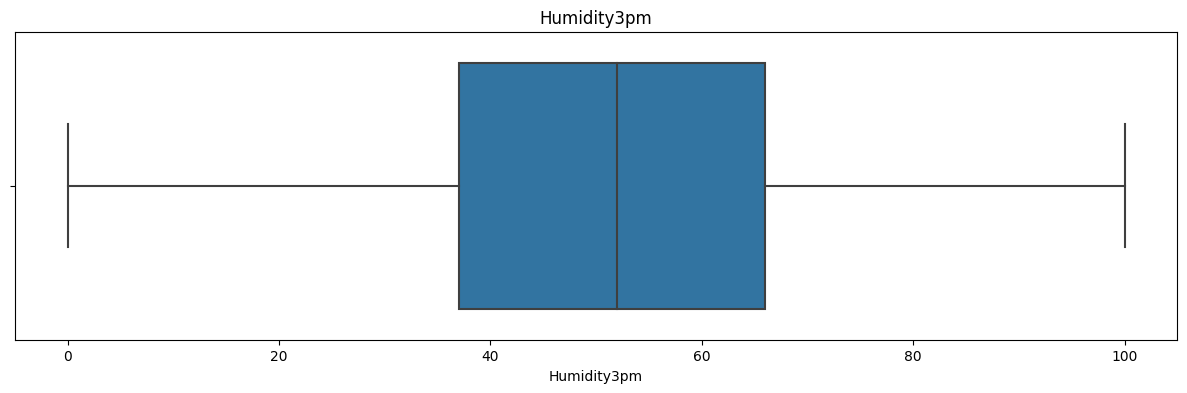

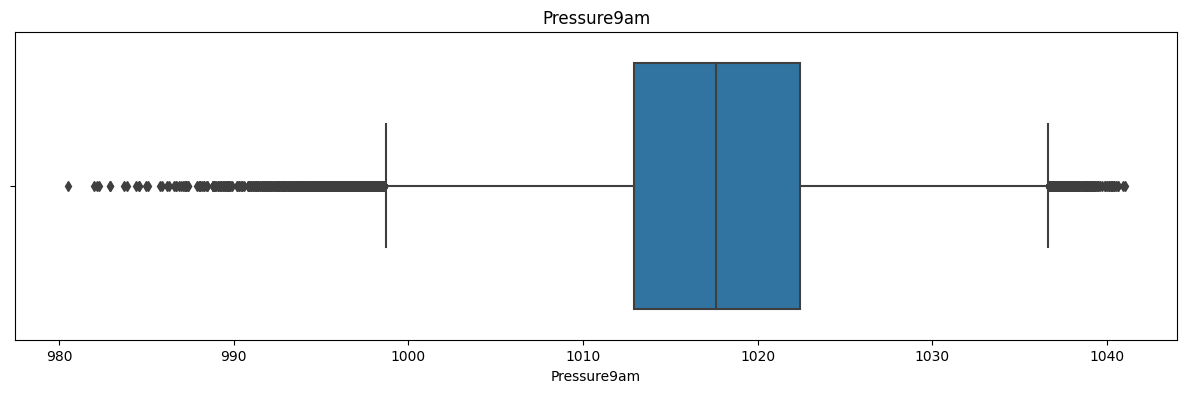

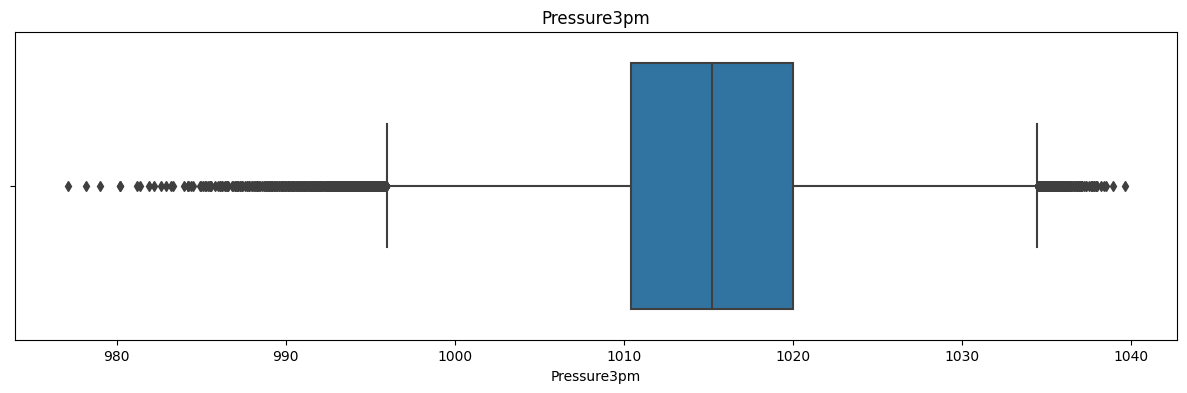

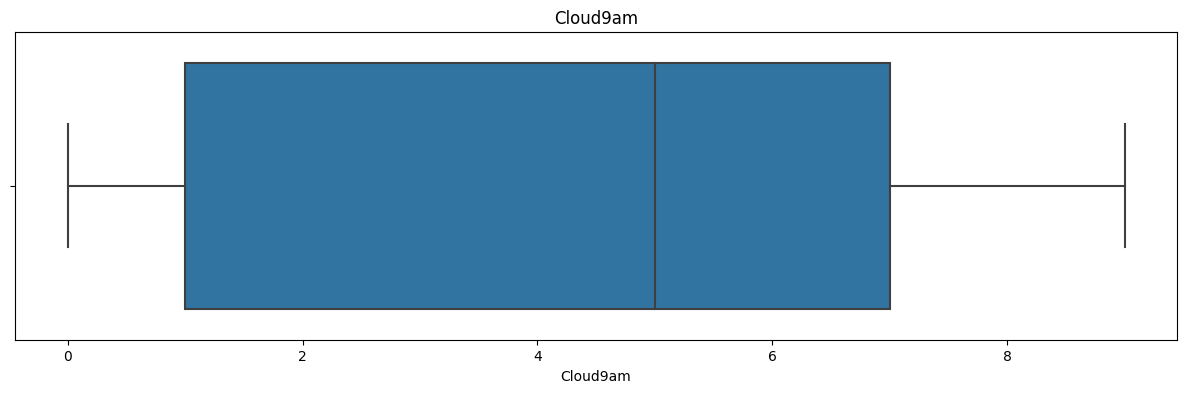

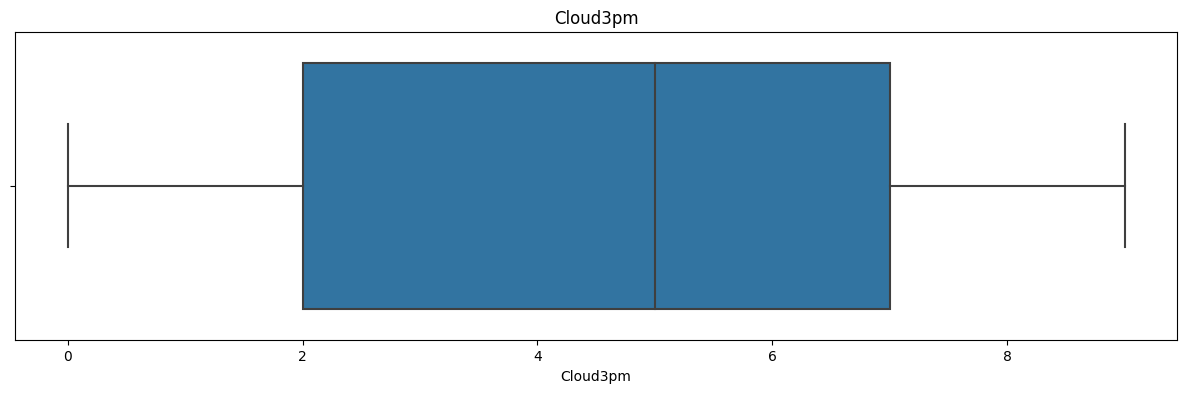

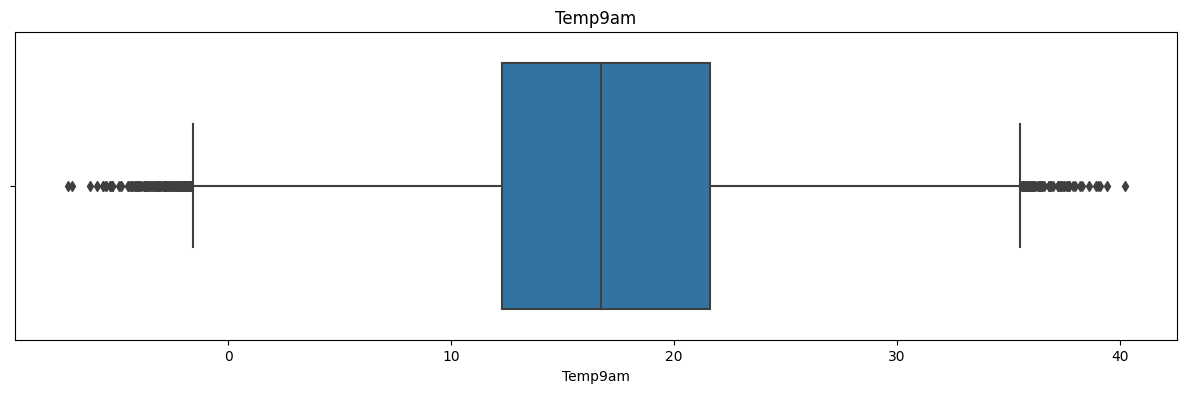

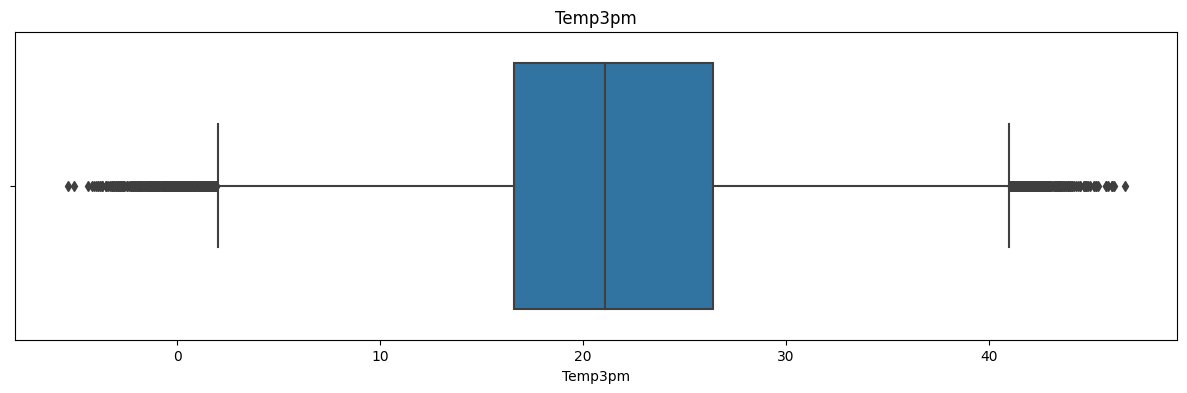

In [ ]:
# megecek outlier menggunakan boxplot
for i in data_rain[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=data_rain[numerical_col][i])

* Kesimpulan Sementara:

  Terlihat melalui visualisasi boxplot  masih terdapat outlier pada kolom rainfall, evaporation, widspeed9am, dan windspeed3pm.

#### D.4.6 Memisahkan kolom yang memiliki outlier

Text(0, 0.5, 'WindSpeed3pm')

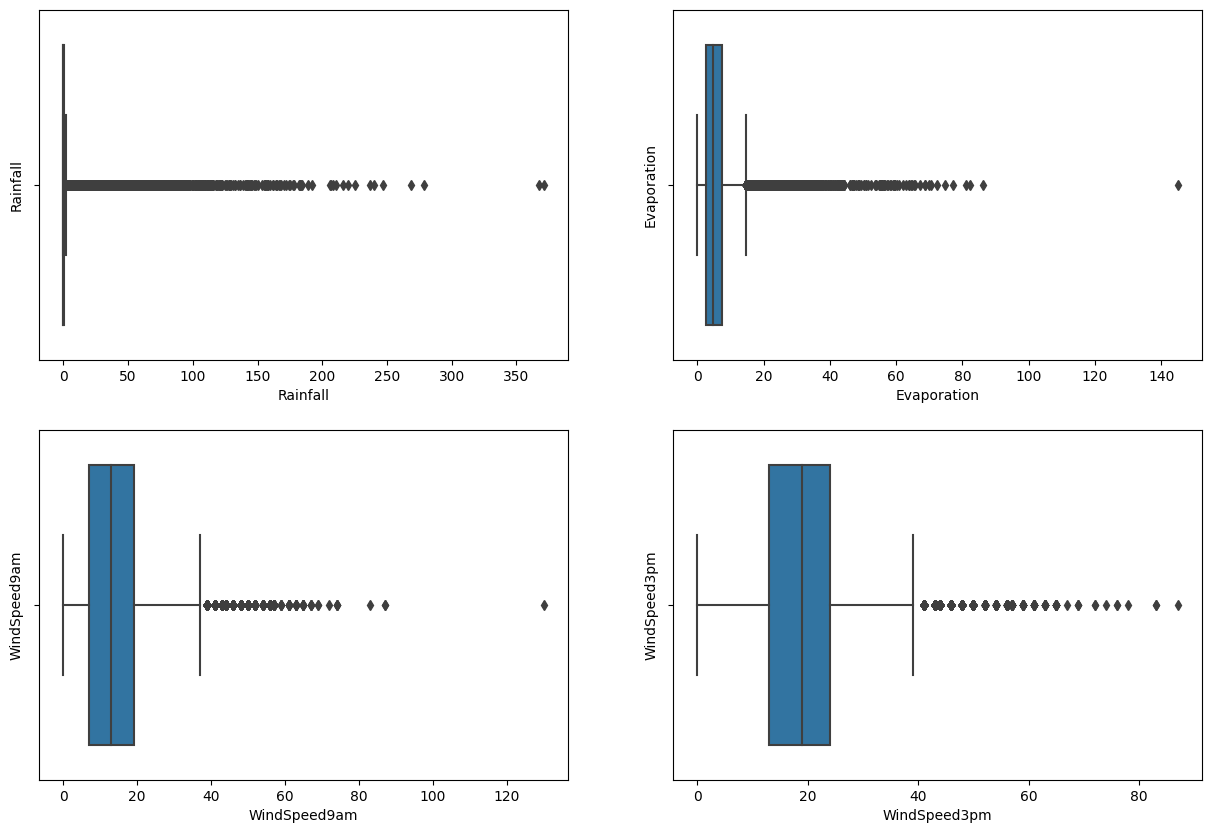

In [ ]:
# melihat kolom yang tedapat outlier
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = sns.boxplot(x=data_rain["Rainfall"])
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = sns.boxplot(x=data_rain["Evaporation"])
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = sns.boxplot(x=data_rain["WindSpeed9am"])
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = sns.boxplot(x=data_rain["WindSpeed3pm"])
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

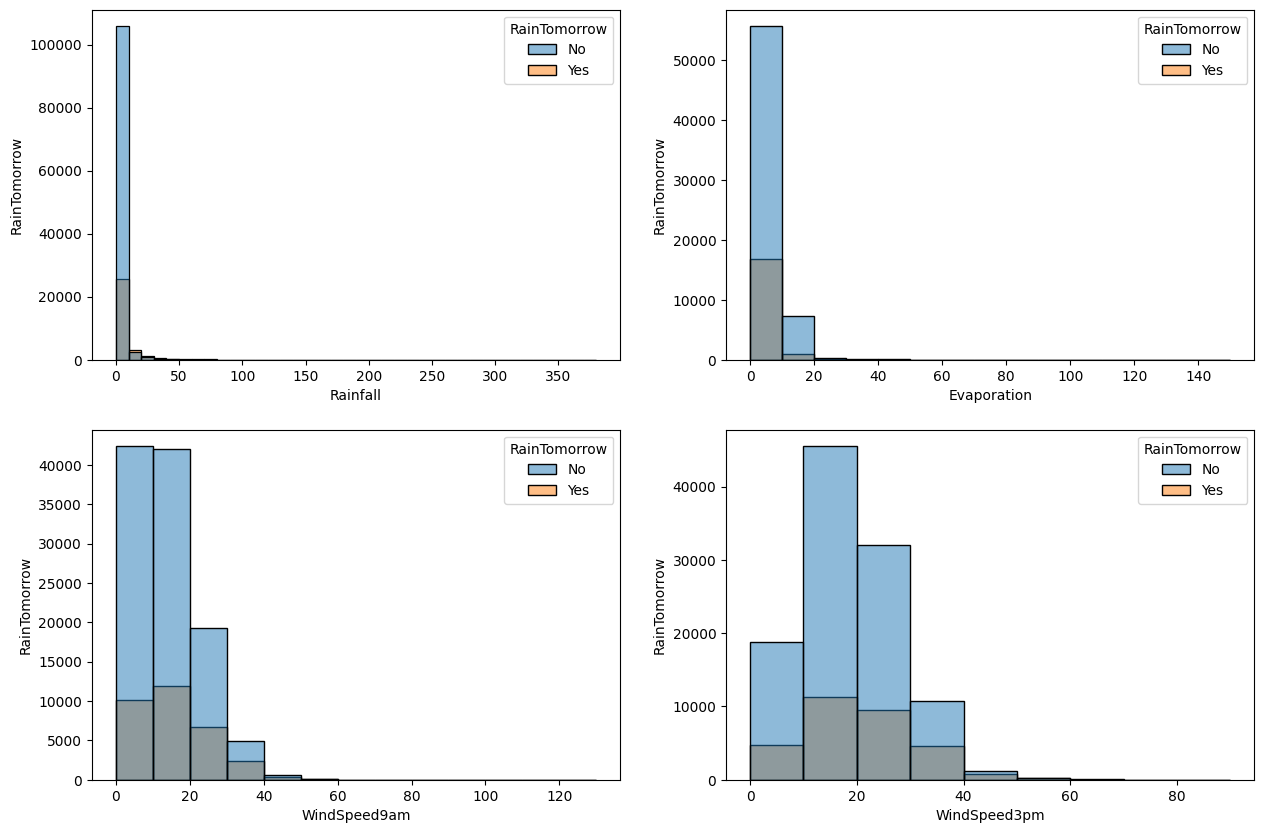

In [ ]:
# mengecek distribusi kolom yang terdapat outlier
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
outlier1 = data_rain[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=outlier1, x="Rainfall", binwidth=10,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
outlier2 = data_rain[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=outlier2, x="Evaporation", binwidth=10,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
outlier3 = data_rain[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=outlier3, x="WindSpeed9am", binwidth=10,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
outlier4 = data_rain[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=outlier4, x="WindSpeed3pm", binwidth=10,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

* Kesimpulan Sementara:

  Berdasarkan data di atas terlihat bahwa terlihat bahwa terdapat skewness pada visualisasi histogram di atas. 

In [ ]:
# menemukan outlier kolom Rainfall
IQR = data_rain.Rainfall.quantile(0.75) - data_rain.Rainfall.quantile(0.25)
Lower_fence = data_rain.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data_rain.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom Evaporation
IQR = data_rain.Evaporation.quantile(0.75) - data_rain.Evaporation.quantile(0.25)
Lower_fence = data_rain.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data_rain.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom WindSpeed9am
IQR = data_rain.WindSpeed9am.quantile(0.75) - data_rain.WindSpeed9am.quantile(0.25)
Lower_fence = data_rain.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data_rain.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom WindSpeed3pm
IQR = data_rain.WindSpeed3pm.quantile(0.75) - data_rain.WindSpeed3pm.quantile(0.25)
Lower_fence = data_rain.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data_rain.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers values falls < -2.4000000000000004 or > 3.2
Evaporation outliers values falls < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers values falls < -29.0 or > 55.0
WindSpeed3pm outliers values falls < -20.0 or > 57.0


In [ ]:
def max_value(df3, feature, top):
    return np.where(df3[feature]>top, top, df3[feature])

for df3 in [data_rain]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

Text(0, 0.5, 'RainTomorrow')

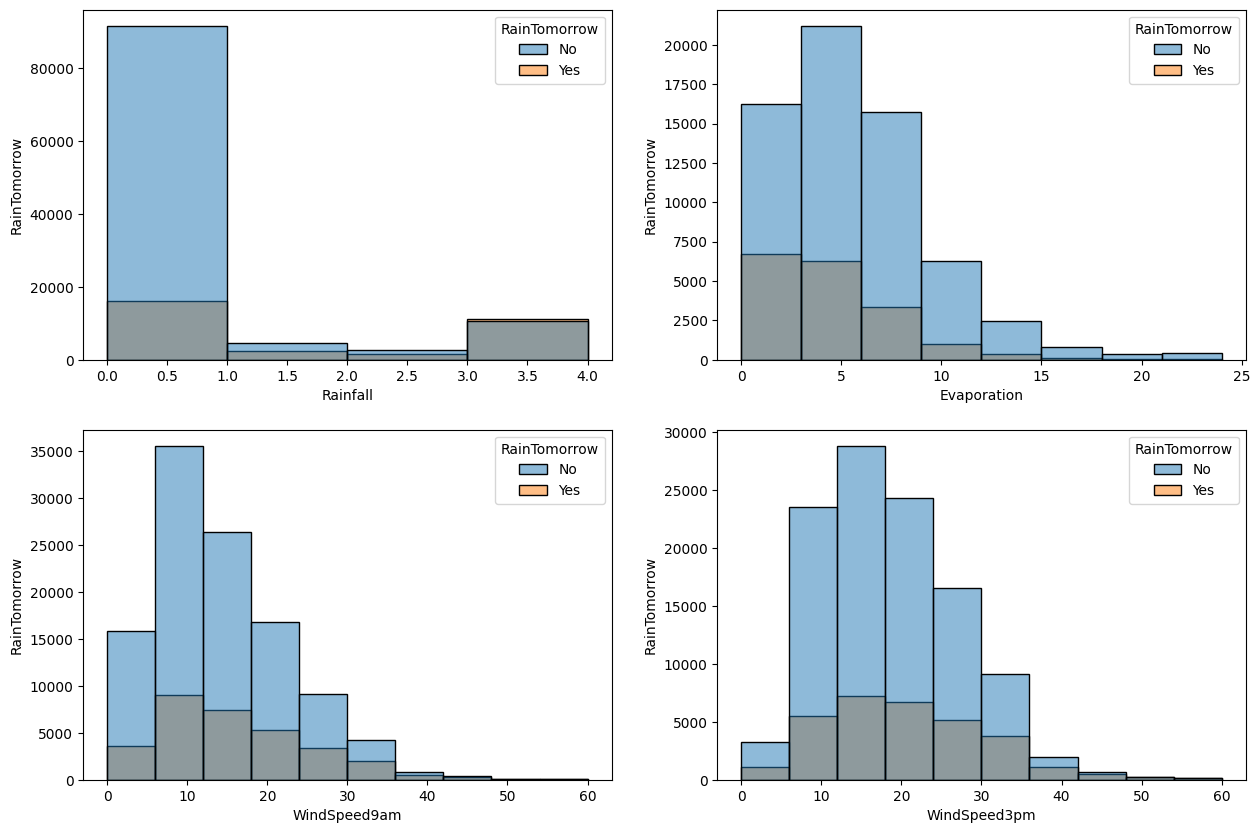

In [ ]:
# mengecek kolom yang terdapat outlier dengan visualisasi histogram
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
outlier1_2 = data_rain[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=outlier1_2, x="Rainfall", binwidth=1,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
outlier2_2 = data_rain[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=outlier2_2, x="Evaporation", binwidth=3,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
outlier3_3 = data_rain[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=outlier3_3, x="WindSpeed9am", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
outlier4_4 = data_rain[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=outlier4_4, x="WindSpeed3pm", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

#### D.4.7 Mengisi kolom numerik yang kosong

* Pengambilan keputusan:

  Berdasarkan observasi dari visualisasi di atas terdapat data skewed. Oleh karen itu digunakan pengambilan keputusan dengan mengganti nilai yang missing value dengan media karena tahan terhadap outlier.

In [ ]:
# megecek kolom yang kosong
data_rain[numerical_kol].isnull().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustSpeed    True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
dtype: bool

In [ ]:
# mengganti kolom dengan nilai yang kosong dengan median pada data numerik
for df1 in [data_rain]:
    for col in numerical_kol:
        col_median=data_rain[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [ ]:
# mengecek kembali kolom yang nilainya kosong pada data numerik
data_rain[numerical_kol].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### D.4.8 Mengisi kolom kategori yang kosong

In [ ]:
# mengecek kolom kategori
categorical_col = [var for var in data_rain.columns if data_rain[var].dtype=='O']

print('We have {} Categorical Variables.\n'.format(len(categorical_col)))

print('Categorical Variables:', categorical_col)

data_rain[categorical_col].nunique()

We have 6 Categorical Variables.

Categorical Variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [ ]:
# mengecek kolom kategori dengan nilai yang kosong
data_rain[categorical_col].isnull().any()

Location        False
WindGustDir      True
WindDir9am       True
WindDir3pm       True
RainToday        True
RainTomorrow     True
dtype: bool

In [ ]:
# mengisi nilai pada missing value pada kolom kategori
for df_cat in [data_rain]:
    df_cat['WindGustDir'].fillna(data_rain['WindGustDir'].mode()[0], inplace=True)
    df_cat['WindDir9am'].fillna(data_rain['WindDir9am'].mode()[0], inplace=True)
    df_cat['WindDir3pm'].fillna(data_rain['WindDir3pm'].mode()[0], inplace=True)
    df_cat['RainToday'].fillna(data_rain['RainToday'].mode()[0], inplace=True)
    df_cat['RainTomorrow'].fillna(data_rain['RainTomorrow'].mode()[0], inplace=True)

In [ ]:
# mengecek kembali kolom yang nilainya kosong
data_rain[categorical_col].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### E.5 EDA
---
__EDA__ atau __Exploratory Data Analysis__ meruoakan adalah sebuah proses kritis dalam melakukan investigasi awal pada data dengan tujuan menemukan pola, anomali, menguji hipotesis dan dapat memeriksa asumsi dengan bantuan statistik ringkasan kemudian representasi grafis (visualisasi). 

In [ ]:
# menduplikasi dataset
df_new = data_rain.copy()

In [ ]:
# mengecek kolom kategori
categorical_kol

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
# mengecek kolom numerik
numerical_kol

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

#### E.5.1 Menggambarkan minimal dan maximal temperature berdasarkan lokasi

In [ ]:
# membuat grup untuk lokasi, min dan max temperatur
loc_temp = df_new.groupby("Location")[["MinTemp", "MaxTemp"]].mean().round()
loc_temp = loc_temp.reset_index()
loc_temp.columns= ["Location","MinTemp", "MaxTemp"]
# membuat judul
fig = px.bar(loc_temp, x="Location", y=["MinTemp", "MaxTemp"], title="Autralian City Temperature Average From Minimum to Maximum")
# menampilkan
fig.show()

#### E.5.2 Menggambarkan humidity berdasarkan lokasi

In [ ]:
# membuat grup untuk lokasi, humidity 9 am dan humidity 3 pm
loc_humidity = df_new.groupby("Location")[["Humidity9am", "Humidity3pm"]].mean().round()
loc_humidity = loc_humidity.reset_index()
loc_humidity.columns= ["Location","Humidity9am", "Humidity3pm"]
# membuat judul
fig = px.bar(loc_humidity, x="Location", y=["Humidity9am", "Humidity3pm"], title="Autralian City Humadity From 9 AM to 3 PM  ")
# menampilkan
fig.show()

#### E.5.3 Menggambarkan tekanan berdasarkan lokasi

In [ ]:
# membuat grup untuk lokasi, pressure 9 am dan pressure 3 pm
loc_press = df_new.groupby("Location")[["Pressure9am", "Pressure3pm"]].mean().round()
loc_press = loc_press.reset_index()
loc_press.columns= ["Location","Pressure9am", "Pressure3pm"]
# membuat judul
fig = px.bar(loc_press, x="Location", y=["Pressure9am", "Pressure3pm"], title="Autralian City Pressure From 9 AM to 3 PM  ")
# menampilkan
fig.show()

#### E.5.4 Menggambarkan awan berdasarkan lokasi

In [ ]:
# membuat grup untuk lokasi, cloud 9 am dan cloud 3 pm
loc_cloud = df_new.groupby("Location")[["Cloud9am", "Cloud3pm"]].mean().round()
loc_cloud = loc_cloud.reset_index()
loc_cloud.columns= ["Location","Cloud9am", "Cloud3pm"]
# membuat judul
fig = px.bar(loc_cloud, x="Location", y=["Cloud9am", "Cloud3pm"], title="Autralian City Cloud From 9 AM to 3 PM  ")
# menampilkan
fig.show()

#### E.5.5 Menggambarkan temperature berdasarkan lokasi

In [ ]:
# membuat grup untuk lokasi, temperature 9 am dan temperature 3 pm
loc_temp2 = df_new.groupby("Location")[["Temp9am", "Temp3pm"]].mean().round()
loc_temp2 = loc_temp2.reset_index()
loc_temp2.columns= ["Location","Temp9am", "Temp3pm"]
# membuat judul
fig = px.bar(loc_temp2, x="Location", y=["Temp9am", "Temp3pm"], title="Autralian City Temperature From 9 AM to 3 PM ")
# menampilkan
fig.show()

#### E.5.6 Menggambarkan curah hujan setiap bulan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 1000x800 with 0 Axes>

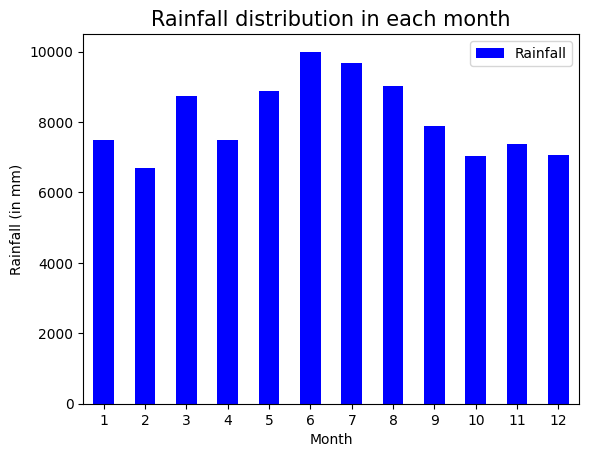

In [ ]:
# membuat grup untuk tahun, bulan dan curah hujan
rainfall =[df_new['Year'], df_new['Month'], df_new['Rainfall']]
headers = ['Year','Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
a = rainfall_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')
# membuat judul
plt.title('Rainfall distribution in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

#### E.5.7 Menggambarkan jumlah berdasarkan tahun

In [ ]:
# melihat kolom year
df_year = df_new['Year']

<Axes: title={'center': 'Number of row per year'}, xlabel='Year', ylabel='count'>

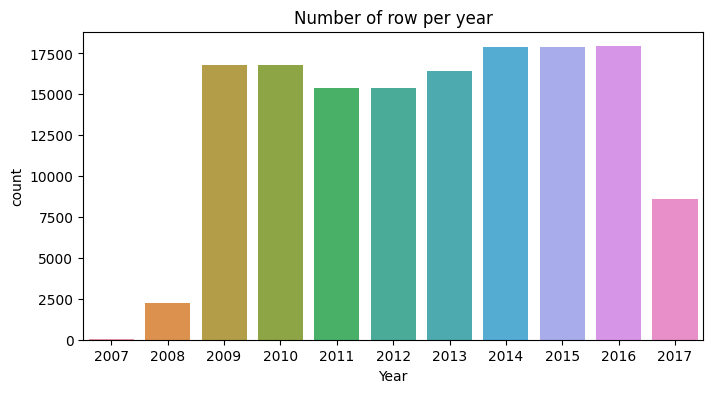

In [ ]:
# membuat visualisasi histogram pada kolom year
plt.figure(figsize=(8,4))
plt.title("Number of row per year")
sns.countplot(x=df_year)

#### E.5.8 Menggambarkan presentase besok hujan atau tidak

Text(0.5, 28.597222222222207, 'Rain Tomorrow')

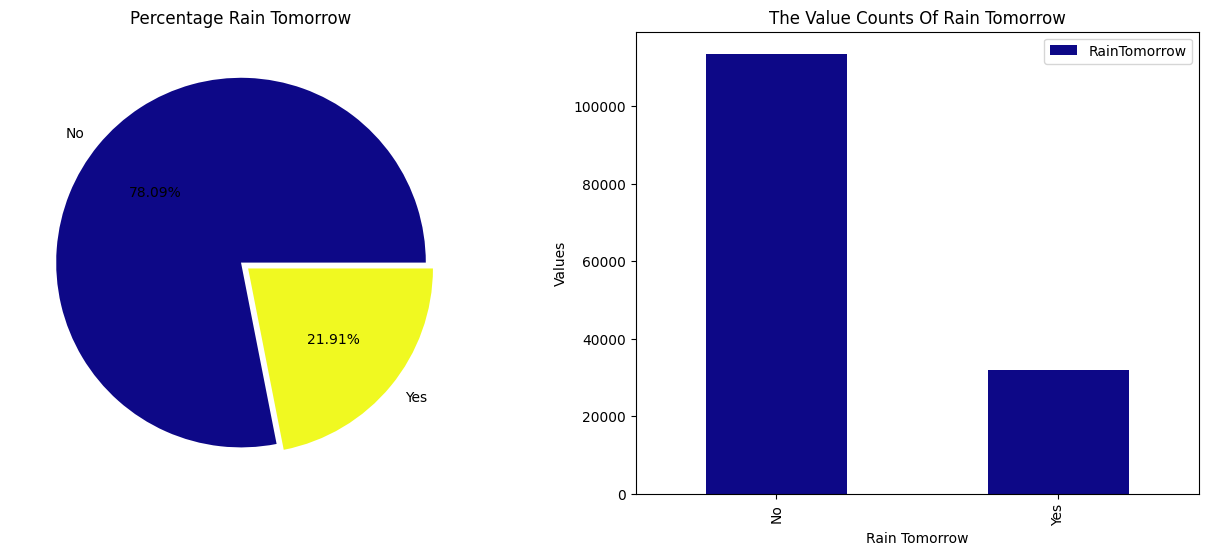

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# membuat pie chart hujan besok
df_new['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='plasma',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Percentage Rain Tomorrow')
ax[0].set_ylabel('')

# membuat bar chart hujan besok
df_new.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='plasma'
)

# menyimpan plot
plt.savefig("rainfall_tomorrow.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# membuat judul
ax[1].set_title('The Value Counts Of Rain Tomorrow')
ax[1].set_ylabel('Values')
ax[1].set_xlabel('Rain Tomorrow')

#### E.5.9 Menggambarkan presentase hari ini hujan atau tidak

Text(0.5, 1.0, 'Rain Today - Rain Tomorrow')

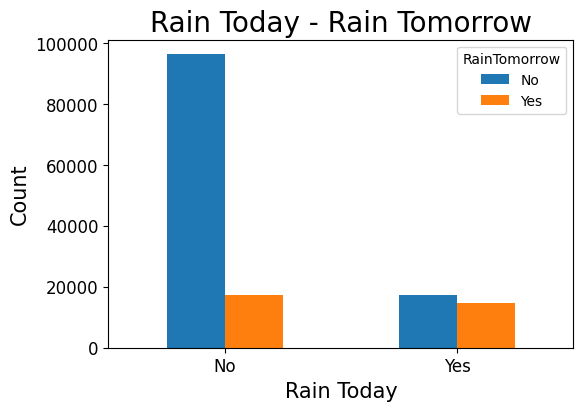

In [ ]:
# mengelompokkan kolom hujan hari ini dan hujan besok
Today_Tomo_plot = pd.crosstab(df_new['RainToday'], df_new['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)

Today_Tomo_plot.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
# membuat judul
plt.title('Rain Today - Rain Tomorrow', fontsize=20)


### F.6 Data Prepocessing
-----
Proses mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini diperlukan untuk memperbaiki kesalahan pada data mentah yang seringkali tidak lengkap dan memiliki format yang tidak teratur.

#### F.6.1 Membuat kelompok kolom

In [ ]:
# mengelompokkan data numerik dan kategori
new_col = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "Day",
    "Month",
    "Year",
]

data_col = df_new[new_col]

data_col.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
0,Albury,W,W,WNW,No,No,13.4,22.9,0.6,4.8,...,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,4.8,...,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,12,2008
2,Albury,WSW,W,WSW,No,No,12.9,25.7,0.0,4.8,...,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,3,12,2008
3,Albury,NE,SE,E,No,No,9.2,28.0,0.0,4.8,...,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,4,12,2008
4,Albury,W,ENE,NW,No,No,17.5,32.3,1.0,4.8,...,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,5,12,2008


#### F.6.2 Membuat label encoder pada kolom kategori

In [ ]:
# mempersiapkan code label encoder
encoder = preprocessing.LabelEncoder()

# mentransformasikan kolom kategori untuk di label encoder
data_col["Location"] = encoder.fit_transform(data_col["Location"])
data_col["WindGustDir"] = encoder.fit_transform(data_col["WindGustDir"])
data_col["WindDir9am"] = encoder.fit_transform(data_col["WindDir9am"])
data_col["WindDir3pm"] = encoder.fit_transform(data_col["WindDir3pm"])
data_col["RainToday"] = encoder.fit_transform(data_col["RainToday"])
data_col["RainTomorrow"] = encoder.fit_transform(data_col["RainTomorrow"])

# menampilkan kolom
print(data_col.head(5))
print('-'*100)
print(data_col.tail(5))

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0         2           13          13          14          0             0   
1         2           14           6          15          0             0   
2         2           15          13          15          0             0   
3         2            4           9           0          0             0   
4         2           13           1           7          0             0   

   MinTemp  MaxTemp  Rainfall  Evaporation  ...  WindSpeed3pm  Humidity9am  \
0     13.4     22.9       0.6          4.8  ...          24.0         71.0   
1      7.4     25.1       0.0          4.8  ...          22.0         44.0   
2     12.9     25.7       0.0          4.8  ...          26.0         38.0   
3      9.2     28.0       0.0          4.8  ...           9.0         45.0   
4     17.5     32.3       1.0          4.8  ...          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  Day  Mon

#### F.6.3 Mengecek korelasi kolom kategori

In [ ]:
# mengelompokkan kolom kategori
new_categor = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"]

data_categor = data_col[new_categor]

In [ ]:
# mengecek korelasi
df_corr_categor = data_categor.corr()
df_corr_categor

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Location,1.000000,-0.003732,-0.002439,0.008769,-0.005484,-0.005498
WindGustDir,-0.003732,1.000000,0.353790,0.563161,0.124675,0.048774
WindDir9am,-0.002439,0.353790,1.000000,0.301249,0.167718,0.035341
WindDir3pm,0.008769,0.563161,0.301249,1.000000,0.121719,0.028890
RainToday,-0.005484,0.124675,0.167718,0.121719,1.000000,0.305744
RainTomorrow,-0.005498,0.048774,0.035341,0.028890,0.305744,1.000000


<Axes: >

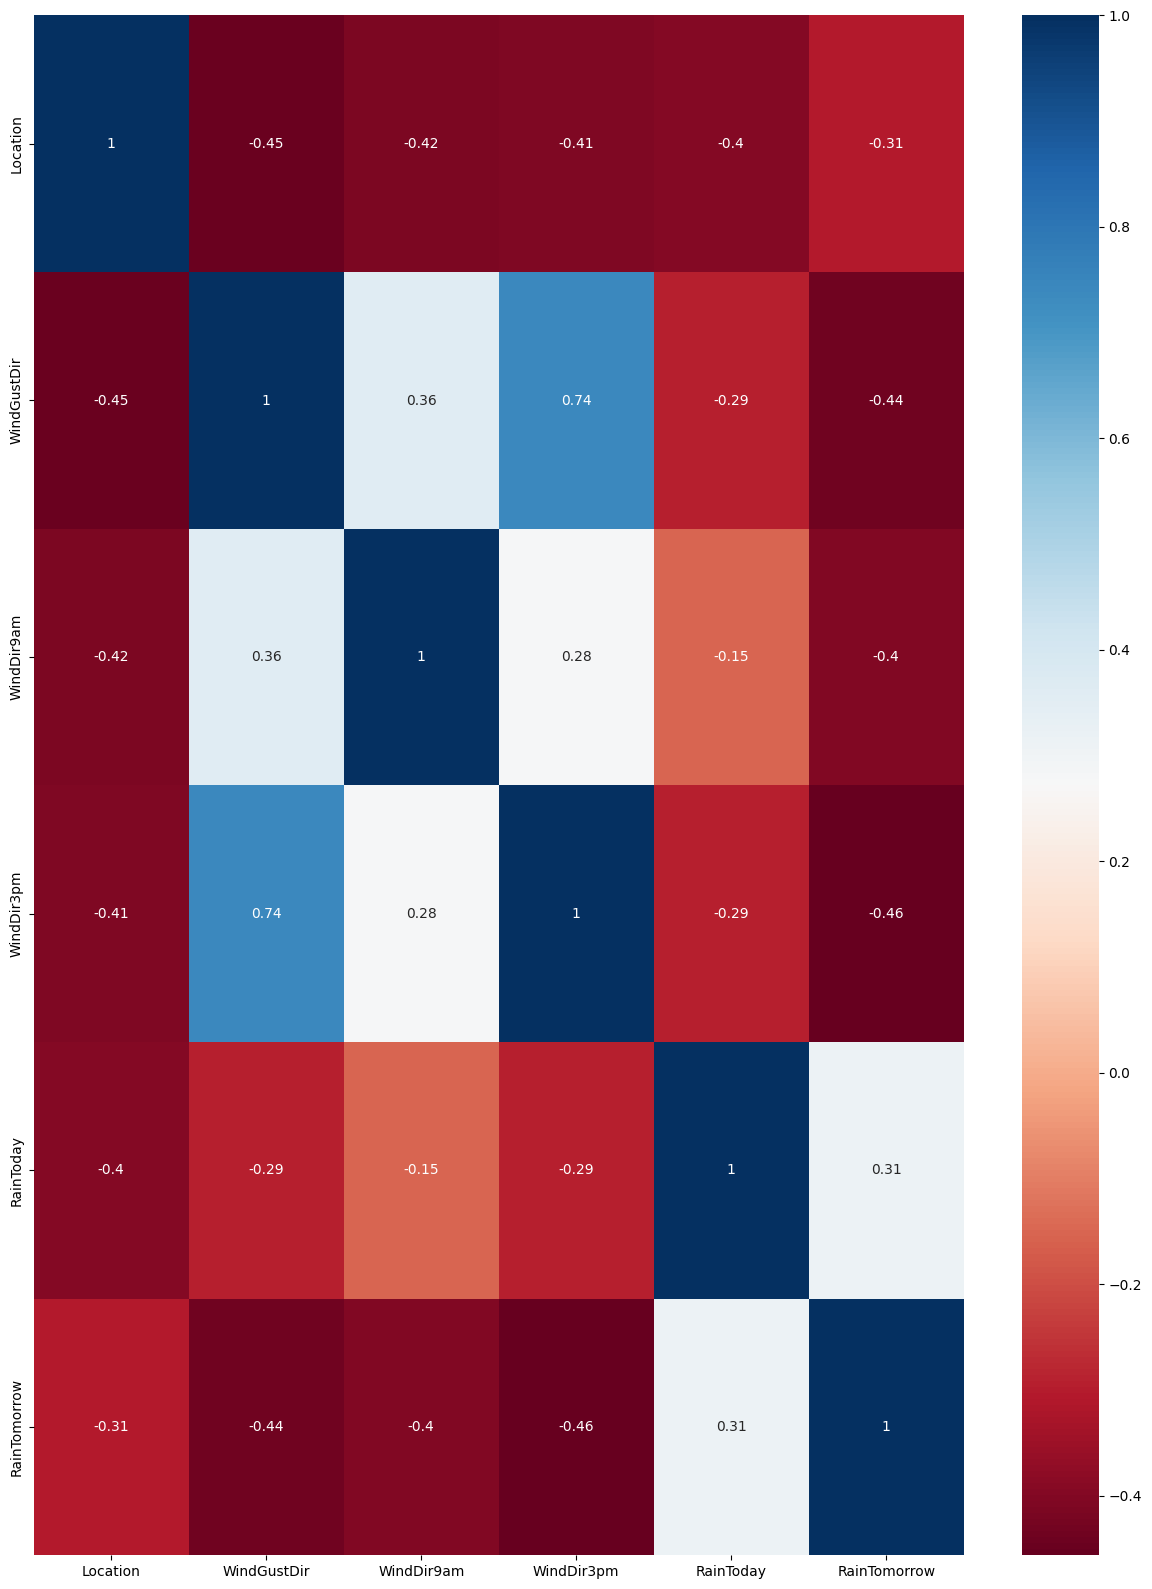

In [ ]:
# menampilkan korelasi dengan rain today dan rain tomorrow
plt.figure(figsize=(15,20))
sns.heatmap(df_corr_categor.corr(),cmap='RdBu' ,annot=True)

#### F.6.3 Mengecek korelasi kolom numerik

In [ ]:
# mengelompokkan kolom numerik
numeric_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "Day",
    "Month",
    "Year",
    "RainTomorrow",
    "RainToday"
]

data_numer = data_col[numeric_col]

data_numer.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year,RainTomorrow,RainToday
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1,12,2008,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,12,2008,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,3,12,2008,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,4,12,2008,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,5,12,2008,0,0


In [ ]:
# mengecek korelasi kolom numerik
df_corr_num = data_numer.corr()
df_corr_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year,RainTomorrow,RainToday
MinTemp,1.000000,0.733358,0.058795,0.401675,0.032632,0.171899,0.173816,0.173452,-0.231310,0.006111,-0.423299,-0.432824,0.897829,0.698574,0.002364,-0.202675,0.042938,0.082249,0.054671
MaxTemp,0.733358,1.000000,-0.236617,0.490097,0.315487,0.066451,0.014436,0.049789,-0.498350,-0.498725,-0.308057,-0.396339,0.879335,0.968332,0.000649,-0.162983,0.061486,-0.156523,-0.225192
Rainfall,0.058795,-0.236617,1.000000,-0.163210,-0.248481,0.153045,0.102506,0.079421,0.370411,0.391995,-0.190460,-0.108089,-0.100214,-0.241094,0.004560,0.009503,-0.016414,0.327693,0.953068
Evaporation,0.401675,0.490097,-0.163210,1.000000,0.310985,0.163611,0.161466,0.112926,-0.419919,-0.318089,-0.236957,-0.258439,0.468633,0.475035,-0.004721,-0.023294,0.042161,-0.096481,-0.155940
Sunshine,0.032632,0.315487,-0.248481,0.310985,1.000000,-0.031229,-0.012085,0.023351,-0.330031,-0.430357,0.035759,-0.010618,0.191385,0.331676,-0.000320,0.017529,0.038682,-0.319412,-0.234048
WindGustSpeed,0.171899,0.066451,0.153045,0.163611,-0.031229,1.000000,0.579032,0.657926,-0.208803,-0.026804,-0.425819,-0.384140,0.145717,0.032375,-0.008651,0.058797,-0.028047,0.220144,0.145332
WindSpeed9am,0.173816,0.014436,0.102506,0.161466,-0.012085,0.579032,1.000000,0.512359,-0.268722,-0.031320,-0.215360,-0.165319,0.127702,0.004942,-0.008723,0.051114,-0.017831,0.086763,0.098930
WindSpeed3pm,0.173452,0.049789,0.079421,0.112926,0.023351,0.657926,0.512359,1.000000,-0.143565,0.016175,-0.277503,-0.239418,0.161479,0.027805,-0.009983,0.059753,-0.029025,0.084103,0.077158
Humidity9am,-0.231310,-0.498350,0.370411,-0.419919,-0.330031,-0.208803,-0.268722,-0.143565,1.000000,0.659290,0.131418,0.175914,-0.469774,-0.491242,0.014990,-0.090100,0.009837,0.251415,0.346902
Humidity3pm,0.006111,-0.498725,0.391995,-0.318089,-0.430357,-0.026804,-0.031320,0.016175,0.659290,1.000000,-0.025986,0.048527,-0.216951,-0.555606,0.012798,-0.018597,-0.009038,0.433167,0.367919


<Axes: >

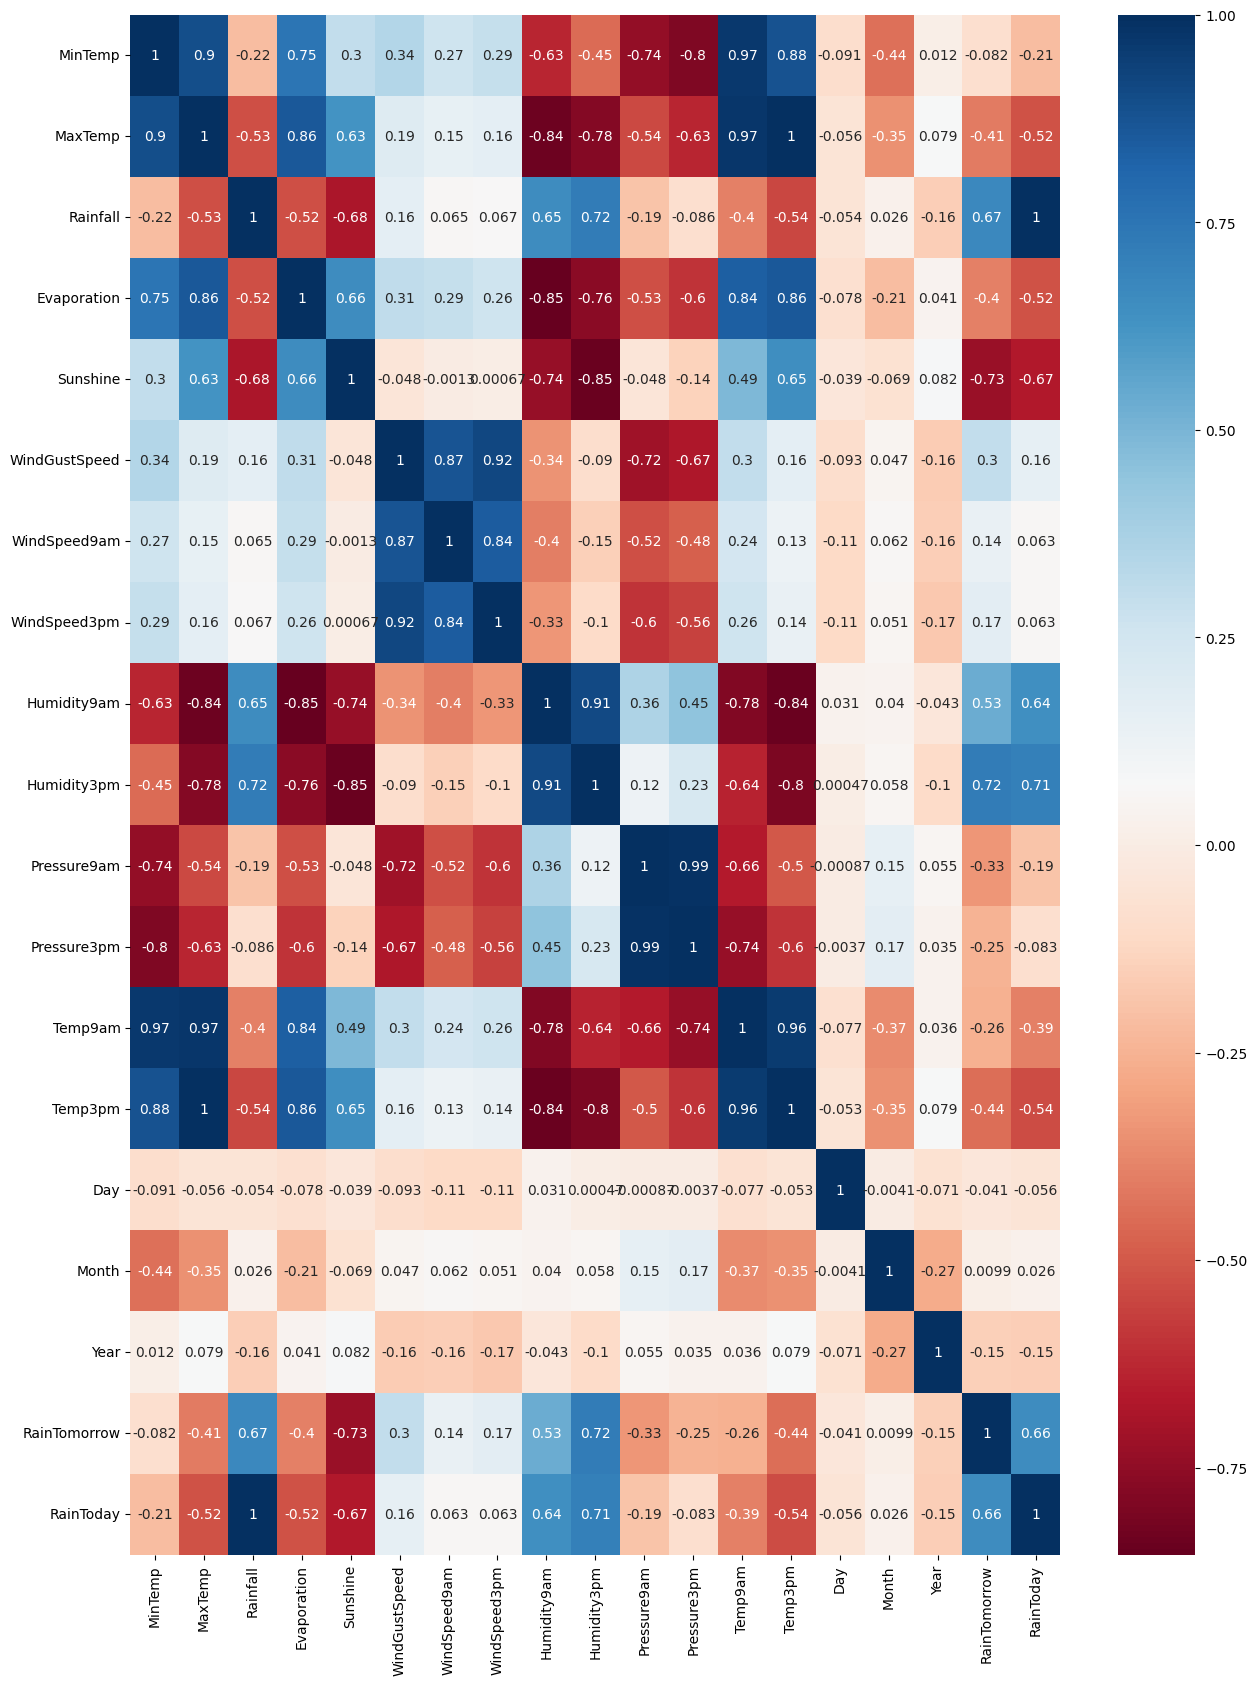

In [ ]:
# menampilkan korelasi kolom numerik
plt.figure(figsize=(15,20))
sns.heatmap(df_corr_num.corr(),cmap='RdBu' ,annot=True)

* Kesimpulan:

  Berdasarkan visualisasi korelasi di atas terlihat bahwa kolom (Location, WindGustDir,WindDir9am,WindDir3pm, MinTemp, MaxTemp, Evaporation, Sunshine, Pressure9am,Pressure3pm, Temp9am, Temp3pm,Day,Year) terhadap kolom rain today dan tomorrow

#### F.6.4 Menghapus kolom yang berelasi rendah

In [ ]:
# menghapus kolom yang berelasi rendah
df_feature = data_col.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm',
                                      'MinTemp', 'MaxTemp', 'Evaporation', 
                                        'Sunshine', 'Pressure9am',
                                        'Pressure3pm', 'Temp9am', 'Temp3pm','Day','Year'])
df_feature.columns

Index(['RainToday', 'RainTomorrow', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Month'],
      dtype='object')

### G.7 Definition Model

### H.8 Train Model

In [ ]:
# split X dan y untuk set train dan test
X = df_feature.drop(['RainTomorrow'], axis=1)

# memisahkan y sebagai kolom yang akan diprediksi
y = df_feature['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# membuat standarisasi dengan standarscaler
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#### H.8.1 Logistic Regression

In [ ]:
import sklearn.metrics as metrics
# membuat logistic regression
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# train the model menggunakan training sets
log_reg_model.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_lr = log_reg_model.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_lr)

print(classification_report(y_test,y_pred_lr))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.72      0.44      0.54      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092

Accuracy: 0.8396466382510656


In [ ]:
#Using predict method to get the model to predict test data
y_pred_test = log_reg_model.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# melihat perbandingan data train dan test

print('Training set score: {:.4f}'.format(log_reg_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg_model.score(X_test, y_test)))

Training set score: 0.8371
Test set score: 0.8396


##### H.8.1.1 Confusion metrics logistic regression

Confusion matrix

 [[21650  1076]
 [ 3589  2777]]

True Positives (TP) =  21650

True Negatives (TN) =  2777

False Positives (FP) =  1076

False Negatives (FN) =  3589


<Axes: >

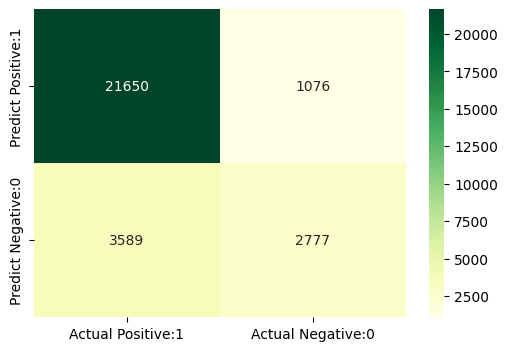

In [ ]:
# membuat confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
# memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_lr)

print('\nTrue Positives (TP) = ', cm_lr[0,0])

print('\nTrue Negatives (TN) = ', cm_lr[1,1])

print('\nFalse Positives (FP) = ', cm_lr[0,1])

print('\nFalse Negatives (FN) = ', cm_lr[1,0])

TP_lr = cm_lr[0,0]
TN_lr = cm_lr[1,1]
FP_lr = cm_lr[0,1]
FN_lr = cm_lr[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_lr = pd.DataFrame(data=cm_lr, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lr, annot=True, fmt='d', cmap='YlGn')

In [ ]:
# melihat precision score
precision_lr = TP_lr / float(TP_lr + FP_lr)
# melihat recall
recall_lr = TP_lr / float(TP_lr + FN_lr)
# melihat rate false positive
false_positive_rate_lr = FP_lr / float(FP_lr + TN_lr)
# melihat specificity
specificity_lr = TN_lr / (TN_lr + FP_lr)
# melihat classification accuracy lr
classification_accuracy_lr = (TP_lr + TN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)
# melihat classification error
classification_error_lr = (FP_lr + FN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)


print('Precision : {0:0.4f}'.format(precision_lr))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_lr))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_lr))
print('Specificity : {0:0.4f}'.format(specificity_lr))
print('Classification Accuracy is : {0:0.4f}'.format(classification_accuracy_lr))
print('Classification Error is: {0:0.4f}'.format(classification_error_lr))


Precision : 0.9527
Recall or Sensitivity : 0.8578
False Positive Rate : 0.2793
Specificity : 0.7207
Classification Accuracy is : 0.8396
Classification Error is: 0.1604


##### H.8.1.2 Memvisualisasikan ROC logistic regression

In [ ]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan hujan

y_pred1_lr = log_reg_model.predict_proba(X_test)[:, 1]

In [ ]:
# memasukkan ROC AUC

from sklearn.metrics import roc_auc_score

roc_auc_lr = roc_auc_score(y_test, y_pred1_lr)

print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_lr))

ROC AUC Logistic Regression: 0.8338


<Figure size 600x400 with 0 Axes>

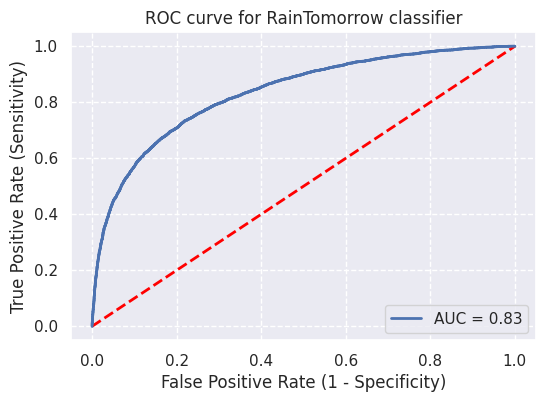

In [ ]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_lr, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



* Kesimpulan:

  Terlihat melalui ROC dan AUC bahwa sekitar (False Positive Rate : 0.2793) merupakan benar positi adalah baik. Semakin rendah nilai false positif rate maka thresholdnya semakin bagus

#### H.8.2 SVM (Support Vector Machine)

In [ ]:
# membuat SVM model
svm_model = SVC(kernel='linear', C=1)

# Train SVM model
svm_model.fit(X_train, y_train)

# prediksi menggunakan SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluasi accuracy
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22726
           1       0.73      0.40      0.52      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.68      0.71     29092
weighted avg       0.83      0.84      0.82     29092

Accuracy: 0.8376185893029011


##### H.8.2.1 Confusion metrics svm

Confusion matrix

 [[21799   927]
 [ 3797  2569]]

True Positives (TP) =  21799

True Negatives (TN) =  2569

False Positives (FP) =  927

False Negatives (FN) =  3797


<Axes: >

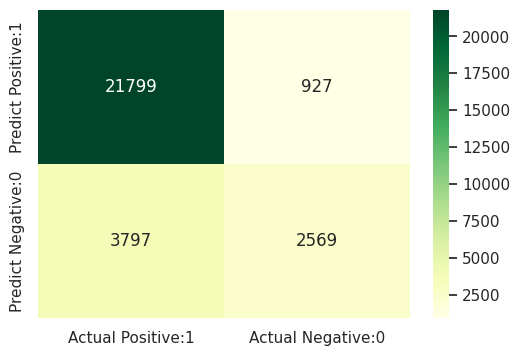

In [ ]:
# membuat confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
# memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_svm)

print('\nTrue Positives (TP) = ', cm_svm[0,0])

print('\nTrue Negatives (TN) = ', cm_svm[1,1])

print('\nFalse Positives (FP) = ', cm_svm[0,1])

print('\nFalse Negatives (FN) = ', cm_svm[1,0])

TP_svm = cm_svm[0,0]
TN_svm = cm_svm[1,1]
FP_svm = cm_svm[0,1]
FN_svm = cm_svm[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='YlGn')


In [ ]:
# melihat precision score
precision_svm = TP_svm / float(TP_svm + FP_svm)
# melihat recall
recall_svm = TP_svm / float(TP_svm + FN_svm)
# melihat rate false positive
false_positive_rate_svm = FP_svm / float(FP_svm + TN_svm)
# melihat specificity
specificity_svm = TN_svm / (TN_svm + FP_svm)
# melihat classification accuracy 
classification_accuracy_svm = (TP_svm + TN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm)
# melihat classification error
classification_error_svm = (FP_svm + FN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm)


print('Precision : {0:0.4f}'.format(precision_svm))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_svm))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_svm))
print('Specificity : {0:0.4f}'.format(specificity_svm))
print('Classification Accuracy is : {0:0.4f}'.format(classification_accuracy_svm))
print('Classification Error is: {0:0.4f}'.format(classification_error_svm))


Precision : 0.9592
Recall or Sensitivity : 0.8517
False Positive Rate : 0.2652
Specificity : 0.7348
Classification Accuracy is : 0.8376
Classification Error is: 0.1624


##### H.8.2.2 ROC svm

In [ ]:
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
model_roc_svm = SGDClassifier(loss='hinge', class_weight='balanced')
model_roc_svm.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred_svm2 = model_roc_svm.decision_function(X_train)    
y_test_pred_svm2 = model_roc_svm.decision_function(X_test) 

In [ ]:
# memasukkan ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC_SVM = roc_auc_score(y_test, y_test_pred_svm2)

print('ROC AUC SVM : {:.4f}'.format(ROC_AUC_SVM))

ROC AUC SVM : 0.8338


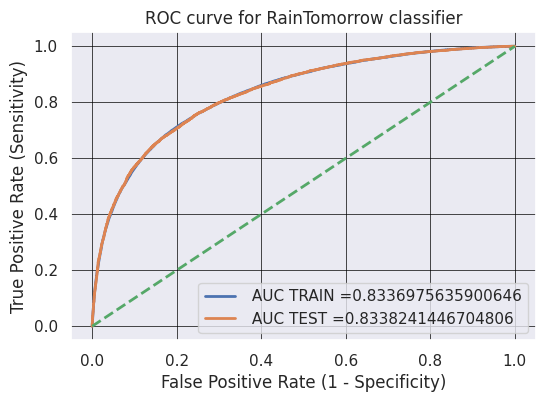

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_svm2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_svm2)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC curve for RainTomorrow classifier")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

* Kesimpulan:

  Terlihat melalui ROC dan AUC bahwa sekitar (False Positive Rate : 0.2652) merupakan benar positi adalah baik. Semakin rendah nilai false positif rate maka thresholdnya semakin bagus

### I.9 Evaluation Model

#### I.9.1 Logistic Regression

In [ ]:
# hyperparametres untuk logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# menemukan models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# menemukan grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# kesimpulan hasil
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837238 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837238 (0.002626) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837238 (0.002626) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837235 (0.002625) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.837238 (0.002626) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837238 (0.002626) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837235 (0.002625) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.837232 (0.002627) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837232 (0.002627) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837232 (0.002625) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.837206 (0.002616) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837206 (0.002616) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837218 (0.002623) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.836951 (0.002646) wit

In [ ]:
# membuat logistic regression
log_reg_model2 = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg', max_iter=1000)

# Train the model menggunkan the training sets
log_reg_model2.fit(X_train, y_train)

# prediksi the response untuk test dataset
y_pred_lr2 = log_reg_model2.predict(X_test)

# melihat accuracy score
accuracy_score_log_new = accuracy_score(y_test, y_pred_lr2)

print(classification_report(y_test, y_pred_lr2))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.72      0.44      0.54      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092

Accuracy: 0.8397497593840231


##### I.9.1.1 Confusion metrics logistic regression

Confusion matrix

 [[21652  1074]
 [ 3588  2778]]

True Positives (TP) =  21652

True Negatives (TN) =  2778

False Positives (FP) =  1074

False Negatives (FN) =  3588


<Axes: >

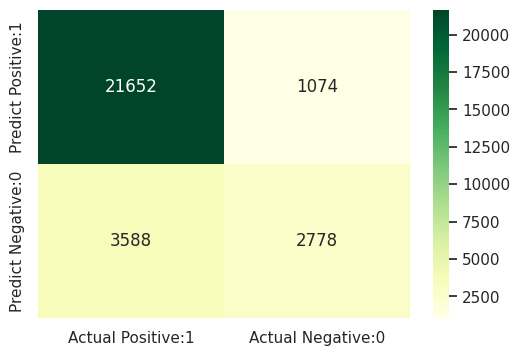

In [ ]:
# membuat confusion matrix
cm_lr2 = confusion_matrix(y_test, y_pred_lr2)
# memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_lr2)

print('\nTrue Positives (TP) = ', cm_lr2[0,0])

print('\nTrue Negatives (TN) = ', cm_lr2[1,1])

print('\nFalse Positives (FP) = ', cm_lr2[0,1])

print('\nFalse Negatives (FN) = ', cm_lr2[1,0])

TP_lr = cm_lr2[0,0]
TN_lr = cm_lr2[1,1]
FP_lr = cm_lr2[0,1]
FN_lr = cm_lr2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_lr2 = pd.DataFrame(data=cm_lr2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lr2, annot=True, fmt='d', cmap='YlGn')

##### I.9.1.2 Memvisualisasikan ROC logistic regression

In [ ]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan hujan

y_pred1_lr2 = log_reg_model2.predict_proba(X_test)[:, 1]

In [ ]:
# memasukkan ROC AUC

from sklearn.metrics import roc_auc_score

roc_auc_lr2 = roc_auc_score(y_test, y_pred1_lr2)

print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_lr2))

ROC AUC Logistic Regression: 0.8338


<Figure size 600x400 with 0 Axes>

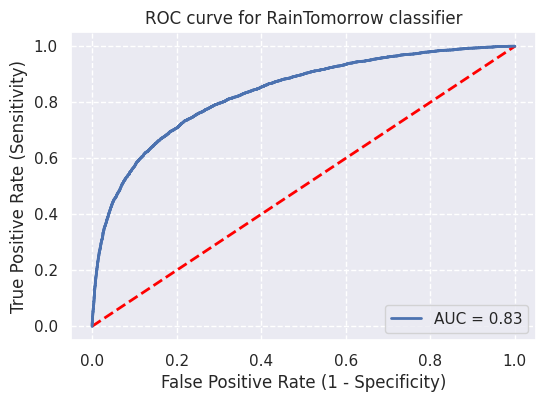

In [ ]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_lr2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



#### I.9.1 SVM (Support Vector Machine)

In [ ]:
# from sklearn.svm import SVC

# param_grid = [
#   {'C': [1, 10, 50, 100, 200, 250], 'kernel': ['linear']},
#   {'C': [1, 10, 50, 100, 200], 'gamma': [10 , 1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
#  ]

In [ ]:
# param_grid_svm = {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],'kernel':['rbf','poly','linear']}

# model_svm2 = SVC()
# search_svm2 = RandomizedSearchCV(estimator=model_svm2, 
#                            param_distributions=param_grid_svm)

# search_svm2.fit(X_train, y_train)
# print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_svm2.best_params_)
# best_model = search_svm2.best_estimator_
# print("estimator terbaik:",best_model)



In [ ]:
# clf_svm = SVC()
# grid_clf = GridSearchCV(clf_svm, param_grid)
# grid_clf.fit(X_train, y_train)
# grid_clf.best_params_

In [ ]:
# predict_svm_new = grid_clf.predict(X_test)

In [ ]:
# print(classification_report(y_test, predict_svm_new))

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score, GridSearchCV
# svm_model = SVC() 
# # svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
# # print(svm_scores)


In [ ]:
# # Parameter grid for GridSearchCV
# param_grid = {
#     'kernel': ['linear', 'rbf'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }

# grid_search_svm = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
# grid_search_svm.fit(X_train, y_train)
# test_score_svm = grid_search_svm.best_estimator_.score(X_train, y_train)

# print(f"Best kernel value: {grid_search_svm.best_params_['kernel']}")
# print(f"Best C value: {grid_search_svm.best_params_['C']}")
# print(f"Best gamma value: {grid_search_svm.best_params_['gamma']}")
# print(f"Best accuracy: {grid_search_svm.best_score_}")


### J.10 Model Inference

In [ ]:
model_inference = {
    "RainToday":[0, 0, 1, 1],
    "Rainfall":[0.0, 0.6, 1.2, 3.4],
    "WindGustSpeed":[20.0, 40.0, 60.0, 80.0],
    "WindSpeed9am":[10.0, 30.0, 40.0, 50.0],
    "WindSpeed3pm":[15.0, 20.0, 35.0, 45.0],
    "Humidity9am":[15.0, 25.0, 40.0, 50.0],
    "Humidity3pm":[22.0, 25.0, 30.0, 16.0],
    "Month":[1, 2, 3, 4],
}

trial_data = pd.DataFrame(model_inference)
trial_data.head(5)

In [ ]:
scaler = StandardScaler()
trial_data = scaler.fit_transform(trial_data)

In [ ]:
pred_log_inf = log_reg_model_new.predict(trial_data)
pred_svm_inf = svm_model.predict(trial_data)

print("Logistic Regression Model = ",pred_log_inf)
print("Support Virtual Machine Model = ",pred_svm_inf)

### K.11 Conclusion

## Prepare for Deployment